In [26]:
import pandas as pd
import numpy as np
# from src.encoder import encode, decode
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from src.ANN import *

In [2]:
df = pd.read_csv('Iris.csv')
df = df.drop(['Id'],axis=1)

x_train = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_train = df['Species'].map({
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}).astype(int)

In [3]:
labelled_y = []
for i in y_train:
    a = [0,0,0]
    a[i] = 1
    labelled_y.append(a)  

In [4]:
X = np.array(x_train)
Y = np.array(labelled_y)

In [5]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=420)

In [6]:
model = Sequential(random_state=42069)
model.add(Dense(units=16, input_dim=4, activation_function="linear"))
model.add(Dense(units=8, activation_function="relu"))
model.add(Dense(units=4, activation_function="linear"))
model.add(Dense(units=3, activation_function="relu"))
model.add(Dense(units=3, activation_function="sigmoid"))
model.compile("sum_squared_error", 0.0001, 0.001)


In [28]:
model.fit(X, Y, batch_size=1, epoch=50)
model.summary()

MODEL INFO
units : 16  ||  activation function : linear  ||  input_dim : 4
weights :
[-0.0023235314355005148, 0.059626524372330264, 0.13081119806629474, 0.5564699212237286, -0.00780789444656043]
[-0.03613576539855815, -0.08256850255985468, -0.14288083116192407, 0.600189366102037, 0.0028361331249994013]
[0.035736880882409984, 0.232669099712913, -0.29230604655297404, 0.3604883715349782, -0.04282256612933704]
[-0.02089377434200199, 0.20876786502939876, 0.14729826598883952, 0.12268159414784524, 0.16050470743395065]
[0.028791169004054193, 0.28143126417919045, 0.03576435519493558, -0.26611725775399303, -0.2696497101147754]
[0.01590698067452948, -0.09445992820264233, 0.1843288065059875, 0.005068420313295467, -0.1727094236241637]
[0.03792508137834232, 0.1732915224174998, 0.24367743454732502, -0.11649192974288043, -0.5345231454740896]
[-0.01870344147174683, 0.05626359190509875, -0.0518019562367508, -0.07531896814035008, 0.46997897174327885]
[-0.08270480577908265, -0.6037162973506525, -0.4920207

### Cell dibawah hanya untuk liat akurasi model saja

In [29]:
model.fit(train_x, train_y, batch_size=1, epoch=500)

In [30]:
y_pred = model.predict(test_x)

In [11]:
decode_test_y = []
for i in test_y:
  decode_test_y.append(np.argmax(i))


In [31]:
decode_pred_y = []
for i in y_pred:
  decode_pred_y.append(np.argmax(i))

In [32]:
accuracy_score(y_pred=decode_pred_y, y_true=decode_test_y)

0.9666666666666667

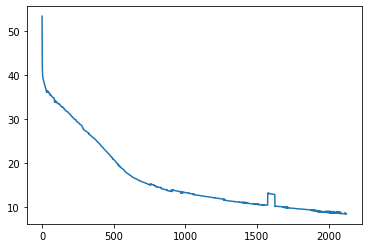

In [33]:
plt.plot(model.errors)